# **Introduction**

It can be difficult to choose the perfect book amid millions of possibilities in today's fascinating world of books. Recommendation systems can help us in this situation. Hybrid recommendation systems, on the other hand, that integrate item- and user-based recommendations can provide more precise and tailored recommendations than any one kind of recommendation system.

This essay will explore the subject of "Hybrid Book Recommendation." This strategy combines "user-based" systems, which make suggestions based on past choices and the actions of users who are similar to the user, with "item-based" systems, which make recommendations based on the attributes, subject matter, or genre of the books.

In this manner, we are able to offer suggestions that take into account a user's interests as well as commonalities with other works.
For instance, we can recommend more detective novels that readers who are similar to you have expressed interest in, depending on the detective novels that user has previously appreciated.

In addition, we have the ability to add books that are comparable to a given one to the list of recommendations based on many aspects of the book, such as its author, genre, plot, characters, etc.
We shall examine hybrid recommendation systems' benefits, workings, and possibly some sample applications in this post. This will enable us to learn more about how they may be applied to give book lovers more thorough and customized recommendations.


# Importing Libraries

The necessary libraries are imported to facilitate data manipulation and visualization.

In [1]:
#Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

# Data Loading and Exploration

Data regarding books, users, and their ratings are loaded from CSV files.
Initial exploration of the datasets is conducted to understand their structure and contents.

In [2]:
# Load data and perform initial exploration

df_books = pd.read_csv("/content/Books.csv")
df_users = pd.read_csv("/content/Users.csv")
df_ratings = pd.read_csv("/content/Ratings.csv")

def check_df(dataframe, head=5):
    print("Shape")
    print(dataframe.shape)
    print("Types")
    print(dataframe.dtypes)
    print("Head")
    print(dataframe.head(head))
    print("Tail")
    print(dataframe.tail(head))
    print("NA")
    print(dataframe.isnull().sum())
    print("Quantiles")
    print(dataframe.describe([0.05, 0.10, 0.25, 0.40, 0.50, 0.60, 0.75, 0.90, 0.95]).T)


In [3]:
# Users
check_df(df_users)

Shape
(278858, 3)
Types
User-ID       int64
Location     object
Age         float64
dtype: object
Head
   User-ID                            Location   Age
0        1                  nyc, new york, usa   NaN
1        2           stockton, california, usa  18.0
2        3     moscow, yukon territory, russia   NaN
3        4           porto, v.n.gaia, portugal  17.0
4        5  farnborough, hants, united kingdom   NaN
Tail
        User-ID                            Location   Age
278853   278854               portland, oregon, usa   NaN
278854   278855  tacoma, washington, united kingdom  50.0
278855   278856           brampton, ontario, canada   NaN
278856   278857           knoxville, tennessee, usa   NaN
278857   278858                dublin, n/a, ireland   NaN
NA
User-ID          0
Location         0
Age         110762
dtype: int64
Quantiles
            count           mean           std  min        5%      10%  \
User-ID  278858.0  139429.500000  80499.515020  1.0  13943.85  27886.

In [4]:
# books
check_df(df_books)

Shape
(271360, 8)
Types
ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object
Head
         ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author Year-Of-Publication                   Publisher  \
0    Mark P. O. Morford                2002     Oxford University Press   
1  Richard Bruce Wright                2001       HarperFlamingo Canada   
2          Carlo D'Este                1991             HarperPerennial   
3      G

In [5]:
# ratings
check_df(df_ratings)

ratings_with_book_titles = df_ratings.merge(df_books,on='ISBN')

ratings_with_book_titles.drop(columns=["ISBN","Image-URL-S","Image-URL-M"],axis=1,inplace=True)

final_df = ratings_with_book_titles.merge(df_users.drop("Age", axis=1), on="User-ID")
final_df = final_df.drop(["Year-Of-Publication", "Image-URL-L"],axis=1)
final_df.head()

Shape
(1149780, 3)
Types
User-ID         int64
ISBN           object
Book-Rating     int64
dtype: object
Head
   User-ID        ISBN  Book-Rating
0   276725  034545104X            0
1   276726  0155061224            5
2   276727  0446520802            0
3   276729  052165615X            3
4   276729  0521795028            6
Tail
         User-ID         ISBN  Book-Rating
1149775   276704   1563526298            9
1149776   276706   0679447156            0
1149777   276709   0515107662           10
1149778   276721   0590442449           10
1149779   276723  05162443314            8
NA
User-ID        0
ISBN           0
Book-Rating    0
dtype: int64
Quantiles
                 count           mean           std  min       5%      10%  \
User-ID      1149780.0  140386.395126  80562.277719  2.0  13799.0  28591.0   
Book-Rating  1149780.0       2.866950      3.854184  0.0      0.0      0.0   

                 25%       40%       50%       60%       75%       90%  \
User-ID      70345.0  112

,User-ID,Book-Rating,Book-Title,Book-Author,Publisher,Location
0,276725,0,Flesh Tones: A Novel,M. J. Rose,Ballantine Books,"tyler, texas, usa"
1,2313,5,Flesh Tones: A Novel,M. J. Rose,Ballantine Books,"cincinnati, ohio, usa"
2,2313,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,Tor Books,"cincinnati, ohio, usa"
3,2313,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,Vintage,"cincinnati, ohio, usa"
4,2313,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,HarperCollins,"cincinnati, ohio, usa"


# EDA - Exploratory Data Analysis

Exploratory data analysis techniques are applied to gain insights into the distribution of book ratings, top-rated books, publisher ratings, and other relevant metrics.

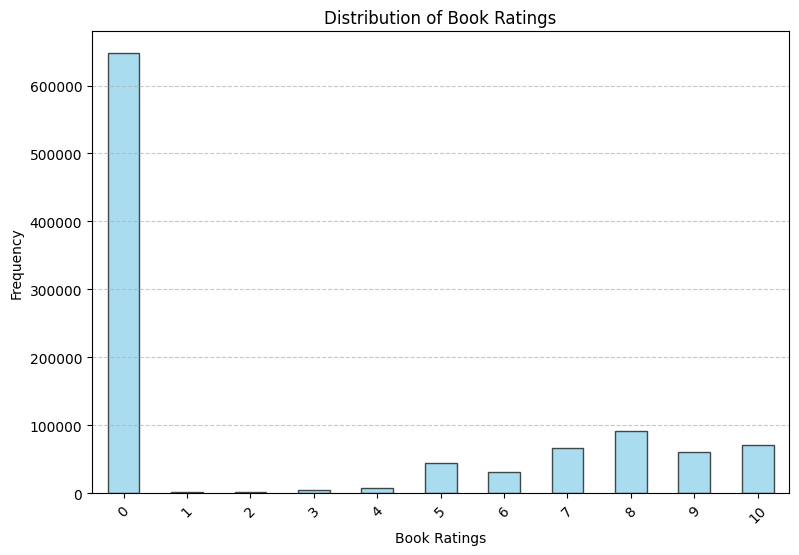

Top 10 Books with the Highest Average Ratings:
Book-Title
Film Is: The International Free Cinema                                                                                                    10.0
More Secrets of Happy Children: Embrace Your Power as a Parent--and Help Your Children be Confident, Positive, Well-Adjusted and Happy    10.0
Jo's Boys : From the Original Publisher                                                                                                   10.0
The Vanished Priestess : An Annie Szabo Mystery                                                                                           10.0
Game and Hunting                                                                                                                          10.0
Joan Miro: 1893-1983 (Basic Series)                                                                                                       10.0
The Vampire's Apprentice                                                            

In [6]:
# EDA - Exploratory Data Analysis¶

# Plotting a bar chart for the distribution of book ratings
plt.figure(figsize=(9, 6))
final_df['Book-Rating'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Book Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Book Ratings')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Displaying the top 10 books with the highest average ratings
top_rated_books = final_df.groupby('Book-Title')['Book-Rating'].mean().sort_values(ascending=False).head(10)
print("Top 10 Books with the Highest Average Ratings:")
print(top_rated_books)

# Displaying the count of ratings for each publisher
publisher_rating_counts = final_df['Publisher'].value_counts()
print("\nCount of Ratings for Each Publisher:")
print(publisher_rating_counts)

# Displaying the number of unique publishers
unique_publishers = final_df['Publisher'].nunique()
print("\nNumber of Unique Publishers:", unique_publishers)

# Displaying the count of ratings for each book title
book_title_rating_counts = final_df.groupby('Book-Title')['Book-Rating'].count()
print("\nCount of Ratings for Each Book Title:")
print(book_title_rating_counts)


# Data Preprocessing

Preprocessing steps involve handling missing values, removing irrelevant columns, and preparing the data for further analysis.

In [7]:
# Data Preprocessing

book_rating_counts = final_df.groupby('Book-Title')['Book-Rating'].count()
book_rating_counts.sort_values(ascending=False)

book_rating_counts[book_rating_counts > 50].size

popular_books = book_rating_counts[book_rating_counts > 100]
popular_books_df = final_df[final_df['Book-Title'].isin(popular_books.index)]
popular_books_df

popular_books_df['Book-Rating'].isnull().sum()

0

# User-Based Collaborative Filtering

User-based collaborative filtering techniques are implemented to recommend books to users based on their past interactions and similarities with other users.

In [8]:
# User-Based Collaborative Filtering

user_book_df = popular_books_df.pivot_table(index=['User-ID'], columns = ['Book-Title'], values='Book-Rating')

final_df.shape # 1031136 users

final_df['User-ID'].nunique() # 92106

popular_books_df.shape # 182799 users

popular_books_df['User-ID'].nunique() # 38014 Unique users

user_book_df.shape # (38014, 904)
# 904 books
# 38014 Unique users

user_book_df.head()

random_user = int(pd.Series(user_book_df.index).sample(1, random_state=45).values)
random_user

random_user_df = user_book_df[user_book_df.index == random_user]
random_user_df

reading_books = random_user_df.columns[random_user_df.notna().any()].tolist()
reading_books

reading_books_df = user_book_df[reading_books]
reading_books_df

reading_books_df.T.notnull()

user_book_count = reading_books_df.T.notnull().sum()
user_book_count

user_book_count = user_book_count.reset_index()

user_book_count.columns = ["User-ID", "Book-Count"]
user_book_count

user_book_count[user_book_count["Book-Count"] >= 2].sort_values("Book-Count", ascending=False)

perc = len(reading_books) * 60 / 100
users_same_books = user_book_count[user_book_count["Book-Count"] > perc]["User-ID"]
users_same_books

final_book_df = pd.concat([reading_books_df[reading_books_df.index.isin(users_same_books)],
                      random_user_df[reading_books]])
final_book_df

corr_df = final_book_df.drop_duplicates().T.corr().unstack().sort_values().drop_duplicates()
corr_df

corr_df = pd.DataFrame(corr_df, columns=["corr"])

corr_df.index.names = ['user_id_1', 'user_id_2']
corr_df

corr_df = corr_df.reset_index()
corr_df

top_users = corr_df[(corr_df["user_id_1"] == random_user) & (corr_df["corr"] >= 0.4999)][
    ["user_id_2", "corr"]].reset_index(drop=True)
top_users

top_users = top_users.sort_values(by='corr', ascending=False)
top_users

top_users.rename(columns={"user_id_2": "User-ID"}, inplace=True)
top_users

top_users_ratings = top_users.merge(final_df[["User-ID", "Book-Title", "Book-Rating"]], how='inner')
top_users_ratings

top_users_ratings = top_users_ratings[top_users_ratings["User-ID"] != random_user]
top_users_ratings

top_users_ratings.head()

top_users_ratings['weighted_rating'] = top_users_ratings['corr'] * top_users_ratings['Book-Rating']
top_users_ratings

top_users_ratings = top_users_ratings[top_users_ratings["weighted_rating"] > 5]
top_users_ratings

top_users_ratings.groupby('Book-Title').agg({"weighted_rating": "mean"})

recommendation_df = top_users_ratings.groupby('Book-Title').agg({"weighted_rating": "mean"})

recommendation_df = recommendation_df.reset_index()
recommendation_df[recommendation_df["weighted_rating"] > 7.5]

books_to_be_recommend = recommendation_df[recommendation_df["weighted_rating"] > 8].sort_values("weighted_rating", ascending=False)
books_to_be_recommend.head(5)

final_df[final_df["User-ID"] == random_user]

,User-ID,Book-Rating,Book-Title,Book-Author,Publisher,Location
366183,28150,9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,Scholastic,"portland, oregon, usa"
366184,28150,9,Life of Pi,Yann Martel,Harvest Books,"portland, oregon, usa"
366185,28150,0,The Red Tent (Bestselling Backlist),Anita Diamant,Picador USA,"portland, oregon, usa"
366186,28150,8,A Passage to India,E.M. Forster,Harvest Books,"portland, oregon, usa"
366187,28150,0,The Blue Nowhere : A Novel,Jeffery Deaver,Pocket,"portland, oregon, usa"
366188,28150,10,Johnny Got His Gun,Dalton Trumbo,Bantam Books,"portland, oregon, usa"
366189,28150,6,Soul Mountain,Gao Xingjian,Perennial,"portland, oregon, usa"
366190,28150,9,Across the Nightingale Floor (Tales of the Oto...,Lian Hearn,Riverhead Books,"portland, oregon, usa"
366191,28150,10,"Grass for His Pillow: Tales of the Otori, Book 2",Lian Hearn,Riverhead Books,"portland, oregon, usa"
366192,28150,5,In Light of India,Octavio Paz,Harvest Books,"portland, oregon, usa"


# Item-Based Collaborative Filtering

Item-based collaborative filtering methods are explored, enabling recommendations based on the attributes and similarities between books.

In [16]:
# Item-Based Collaborative Filtering

def create_book_df(min_user_ratings):
    df_books = pd.read_csv("/content/Books.csv")
    df_users = pd.read_csv("/content/Users.csv")
    df_ratings = pd.read_csv("/content/Ratings.csv")

    ratings_with_book_titles = df_ratings.merge(df_books,on='ISBN')
    ratings_with_book_titles.drop(columns=["ISBN","Image-URL-S","Image-URL-M"],axis=1,inplace=True)

    final_df = ratings_with_book_titles.merge(df_users.drop("Age", axis=1), on="User-ID")
    final_df = final_df.drop(["Year-Of-Publication", "Image-URL-L"],axis=1)

    book_rating_counts = final_df.groupby('Book-Title')['Book-Rating'].count()
    book_rating_counts.sort_values(ascending=False)

    popular_books = book_rating_counts[book_rating_counts > min_user_ratings] # dynamic
    popular_books_df = final_df[final_df['Book-Title'].isin(popular_books.index)]

    user_book_df = popular_books_df.pivot_table(index=['User-ID'], columns = ['Book-Title'], values='Book-Rating')
    return user_book_df

def item_based_recommender(book_name, user_book_df):
        book_name = user_book_df[book_name]
        return user_book_df.corrwith(book_name).sort_values(ascending=False).head(10)

user_book_df = create_book_df(100)

random_book_name = np.random.choice(user_book_df.columns)
item_based_recommender(random_book_name, user_book_df)

Book-Title
I'll Be Seeing You                                  1.0
Without Remorse                                     1.0
Night over Water                                    1.0
The Bear and the Dragon (Jack Ryan Novels)          1.0
Standoff                                            1.0
The Jester                                          1.0
The Eye of the World (The Wheel of Time, Book 1)    1.0
Kaleidoscope                                        1.0
Jewel                                               1.0
The Reef                                            1.0
dtype: float64